In [27]:
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

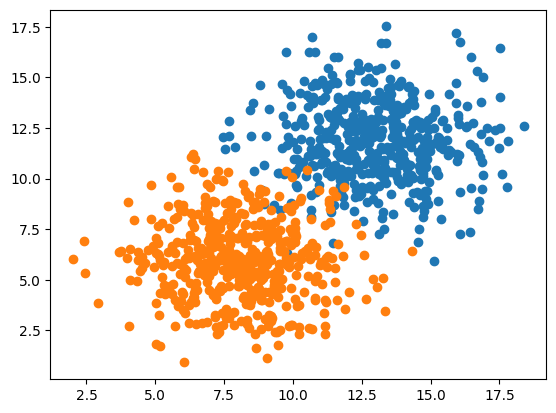

In [28]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
 
X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
 
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [29]:
model = Sequential()
model.add(Dense(units = 1, input_shape = (2,), activation='sigmoid' ))
adam = Adam(learning_rate = 0.1)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h = model.fit(x=X, y=y, verbose=1, batch_size=50, epochs = 500, shuffle='true')

Epoch 1/500


c:\Users\fadhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5028 - loss: 3.4230   
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5713 - loss: 0.8164 
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7488 - loss: 0.4806 
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9131 - loss: 0.3924 
Epoch 5/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9297 - loss: 0.3454 
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9038 - loss: 0.3171 
Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9360 - loss: 0.2907 
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9478 - loss: 0.2829 
Epoch 9/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9445 - loss: 0.2516 
Epoch 10/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9530 - loss: 0.2277 
Epoch 11/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9521 - loss: 0.2175 
Epoch 12/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

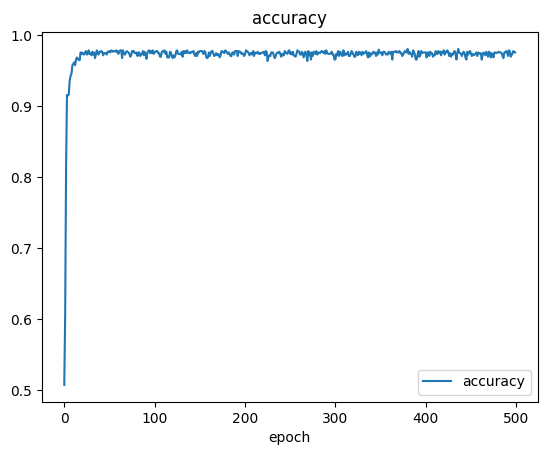

In [30]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

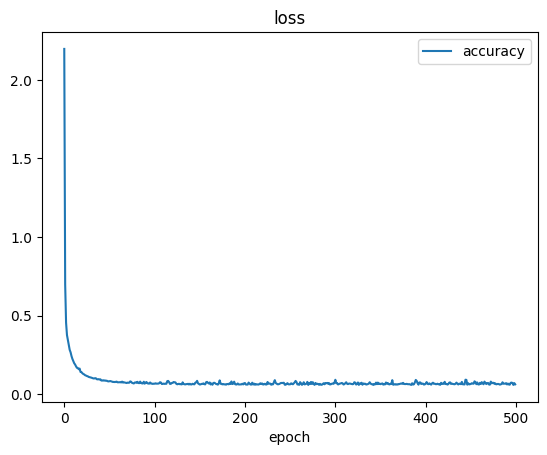

In [31]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['accuracy'])

In [46]:
def plot_decision_boundary(X, y, model):
     x_span = np.linspace(min(X[:,0]) -1, max(X[:, 0]) +1, 50)
     y_span = np.linspace(min(X[:,1]) -1, max(X[:, 1]) +1, 50)
     xx, yy = np.meshgrid(x_span, y_span)
     xx_, yy_ = xx.ravel(), yy.ravel()
     grid = np.c_[xx_, yy_]
     pred_func = model.predict(grid)
     z = pred_func.reshape(xx.shape)
     plt.contourf(xx, yy, z)
     


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


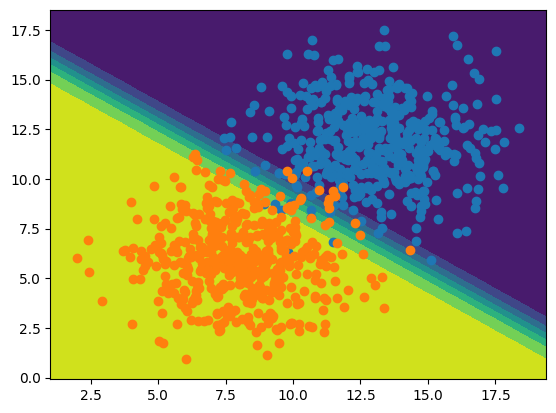

In [48]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Prediction is : [[0.9999887]]


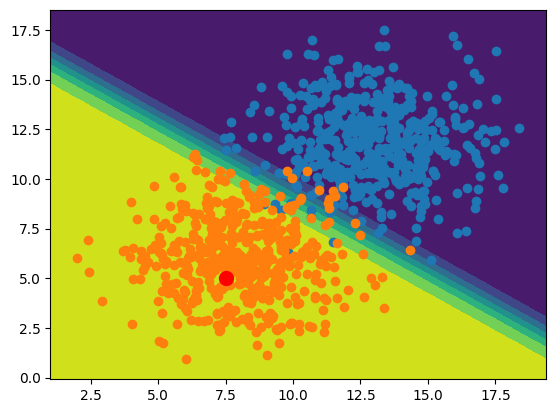

In [50]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 7.5
y = 5
point = np.array([[x,y]])
prediction = model.predict(point)
plt.plot([x],[y], marker = "o", markersize=10, color = "red")
print("Prediction is :", prediction)